# Market Basket Analysis for E-Commerce

We will use this dataset to perform a modeling technique known as Market Basket Analysis. This is based on the idea that one can predict purchasing patterns within items, which is what makes it popular in the field of retail and commerce. This form of analysis helps many forms of businesses understand behavioral patterns and purchase patterns.

The idea is to find the link between purchased items. For example, if someone purchases Item1, how likely are they to then also purchase Item2? The answer to this can be found with the application of the Apriori Algorithm.

## Importing the necessary Libraries

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules, apriori
# Warnings
import warnings
warnings.filterwarnings('ignore')

print("Importation Complete")

Importation Complete


## Data Importation and Exploration

In this stage, we will be doing the basic data exploration which is to read the data file, get the shape, get the data information and other details about the dataset like if we having missing values, checking to see if our columns have the correct data type and seeing the unique values in our columns

In [2]:
# reading our csv file
df = pd.read_csv("/content/Market Basket Analysis - Groceries_dataset.csv")

In [3]:
#getting the first five rows in our dataset including the columns
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [4]:
#getting the shape of our dataset
df.shape

(38765, 3)

In [5]:
#getting basic summary on the columns of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


From the summary we got on our dataset we can see that fortunately we have no null columns but our column Date has the wrong data type so we will have to take care of that.

In [8]:
#getting the top most sold items in our dataset
df["itemDescription"].nunique()

167

So from the value_counts() method we have over a hundred unique items in our itemDescription column

## Data Preprocessing
This stage consists of renaming the columns if necessary, removing unnecessary columns, taking care of columns with wrong data types to prepare it for easy and accurate data visualization

In [9]:
#renaming the itemDescription column to a suitable name
df = df.rename(columns = {'itemDescription':'Items'})

#printing the df with new column name
df.head()

,Member_number,Date,Items
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [10]:
#changing the data type of our column date to datetime so pandas will recognize it as a date
df["Date"] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

#checking to if change has been done
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Member_number  38765 non-null  int64         
 1   Date           38765 non-null  datetime64[ns]
 2   Items          38765 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 908.7+ KB


Before we move to the visualization aspect, from our dataset we can see that we have over 30,000 rows which means our dataset is extremely large. To address this we will be plotting our visualizations on a monthly and yearly basis.

In [11]:
#adding the year and month color to our dataframe
df["Month"] = df["Date"].dt.month
df["Year"] = df["Date"].dt.year

#printing our df to see the new columns
df.head()

,Member_number,Date,Items,Month,Year
0,1808,2015-07-21,tropical fruit,7,2015
1,2552,2015-01-05,whole milk,1,2015
2,2300,2015-09-19,pip fruit,9,2015
3,1187,2015-12-12,other vegetables,12,2015
4,3037,2015-02-01,whole milk,2,2015


In [12]:
#changing the values for months to categorical variables
df["Month"] = df["Month"].replace([1,2,3,4,5,6,7,8,9,10,11,12], ["January", "Febuary", "March", "April", "May","June",
                                                                 "July", "August", "September", "October",
                                                                 "November", "December"])

In [13]:
#checking the number of years we have in our column
df["Year"].value_counts()

2015    20488
2014    18277
Name: Year, dtype: int64

So our dataset contains transactions for 2 years (2014-2015).

## Data Visualizations
In this stage, we perform data visualization with the necessary libraries to explore trends and patterns in the dataset. Since we are trying to identify items bought together, we will address our dataset in on a yearly basis.

### Visualizations for Year 2014

In [14]:
#grouping our main data into year
data = df[df["Year"]==2014]
data

,Member_number,Date,Items,Month,Year
8696,1664,2014-10-01,rolls/buns,October,2014
8697,3942,2014-12-16,hamburger meat,December,2014
8698,2638,2014-10-10,turkey,October,2014
8699,4735,2014-10-10,specialty chocolate,October,2014
8700,3745,2014-12-09,frankfurter,December,2014
...,...,...,...,...,...
38760,4471,2014-10-08,sliced cheese,October,2014
38761,2022,2014-02-23,candy,Febuary,2014
38762,1097,2014-04-16,cake bar,April,2014
38763,1510,2014-12-03,fruit/vegetable juice,December,2014


In [15]:
#getting the top 20 most sold items from the dataset
most_sold = data["Items"].value_counts().head(20)
print('Most Sold Items: \n')
print(most_sold)

Most Sold Items: 

whole milk               1038
other vegetables          859
rolls/buns                837
soda                      777
yogurt                    640
bottled water             504
root vegetables           479
shopping bags             440
pastry                    405
whipped/sour cream        365
tropical fruit            364
newspapers                342
brown bread               323
domestic eggs             322
bottled beer              319
fruit/vegetable juice     300
margarine                 294
pip fruit                 287
butter                    273
citrus fruit              268
Name: Items, dtype: int64


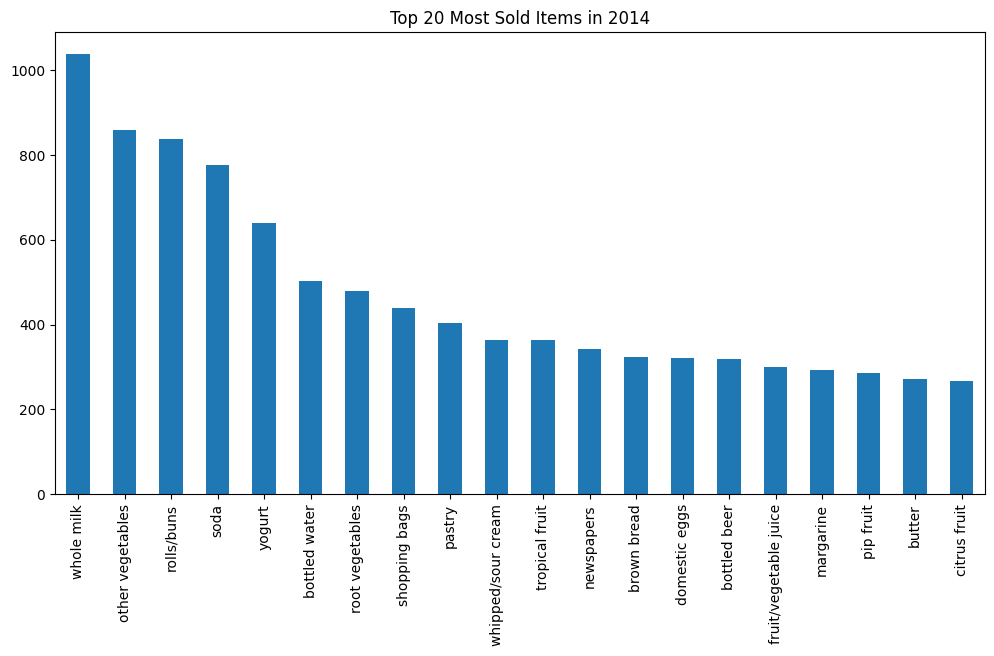

In [21]:
#plotting our most sold items for year 2014
plt.figure(figsize=(12,6))

#using a bar plot
#plt.subplot(1,2,1)
most_sold.plot(kind='bar')
plt.xticks(rotation = 90)
plt.title('Top 20 Most Sold Items in 2014');

So from our bar plot whole milk is the most sold item followed by other vegetables, respectively. Let's see the month that brings in more sales.

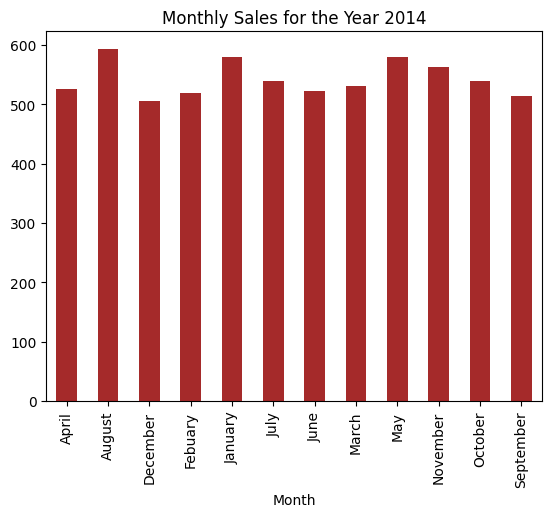

In [30]:
data.groupby("Month")["Member_number"].nunique().plot(kind = "bar", color = "brown", title = "Monthly Sales for the Year 2014")
plt.show();

In [36]:
df_2 = data.groupby("Member_number")["Items"].agg(lambda x: ', '.join(x)).reset_index()
df_2

,Member_number,Items
0,1000,"soda, canned beer, sausage, sausage, whole mil..."
1,1001,"frankfurter, frankfurter, beef, soda, curd, wh..."
2,1002,"tropical fruit, butter milk, sugar, specialty ..."
3,1003,"sausage, rolls/buns"
4,1004,"other vegetables, hygiene articles"
...,...,...
3309,4996,"dessert, salty snack, rolls/buns, misc. bevera..."
3310,4997,"tropical fruit, white wine, curd, grapes"
3311,4998,"rolls/buns, curd"
3312,4999,"bottled water, butter milk, tropical fruit, be..."


### Visualizations for 2015

In [25]:
#grouping our main data into year
data_2015 = df[df["Year"]==2015]
data_2015

,Member_number,Date,Items,Month,Year
0,1808,2015-07-21,tropical fruit,July,2015
1,2552,2015-01-05,whole milk,January,2015
2,2300,2015-09-19,pip fruit,September,2015
3,1187,2015-12-12,other vegetables,December,2015
4,3037,2015-02-01,whole milk,Febuary,2015
...,...,...,...,...,...
37114,1185,2015-08-24,chocolate,August,2015
37115,4656,2015-12-25,newspapers,December,2015
37116,2741,2015-09-11,canned vegetables,September,2015
37117,2654,2015-08-17,coffee,August,2015


In [32]:
#getting the top 20 most sold items from the dataset
most = data_2015["Items"].value_counts().head(20)
print('Most Sold Items for 2015: \n')
print(most)

Most Sold Items for 2015: 

whole milk            1464
other vegetables      1039
rolls/buns             879
sausage                744
soda                   737
yogurt                 694
tropical fruit         668
root vegetables        592
citrus fruit           544
frankfurter            505
pip fruit              457
canned beer            451
bottled water          429
pork                   427
pastry                 380
bottled beer           368
beef                   339
chicken                314
whipped/sour cream     297
shopping bags          291
Name: Items, dtype: int64


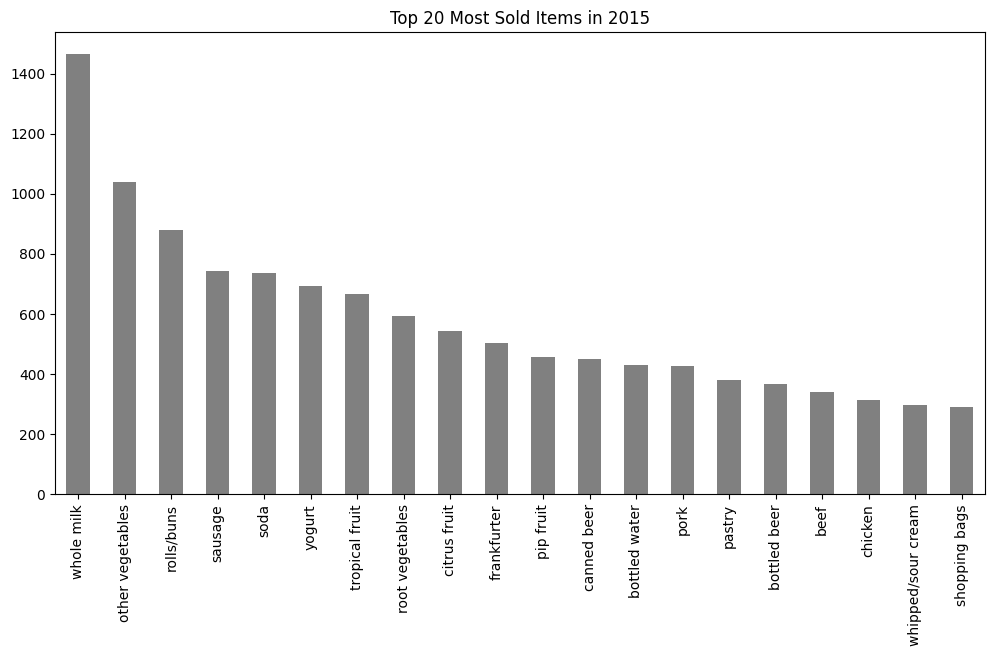

In [29]:
#plotting our most sold items for the year 2015
plt.figure(figsize=(12,6))

#using a bar plot
#plt.subplot(1,2,1)
most.plot(kind='bar', color = "grey")
plt.xticks(rotation = 90)
plt.title('Top 20 Most Sold Items in 2015');

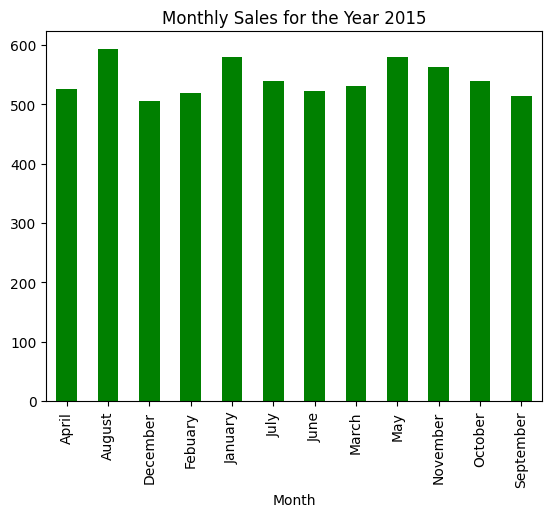

In [34]:
data_2015.groupby("Month")["Member_number"].nunique().plot(kind = "bar", color = "green", title = "Monthly Sales for the Year 2015")
plt.show();

From the visualizations for both years(2014 and 2015) we can observe that:

*   For 2014 and 2015 our top most sold item is whole milk.
*   In the year 2014, the month with the most sales is May and for 2015 the month with most sales is August.




## Market Basket Analysis

To conduct our MBA we will be using Pythons' Apriori Algorithm. This algorithm gives us associative properties within transactions. This is also known as Association Rules for our dataset. The analysis of these association rules depend on three measures- Support, Confidence, and Lift.

*   Lift: The lift refers to how the chances of Item2 being purchased increased given that Item1 is purchased. **Lift(Item1 -> Item2) = (Confidence(Item1 -> Item2)) / (Support(Item2))**
A Lift of 1 means there is no association between products A and B. Lift of greater than 1 means products A and B are more likely to be bought together. Finally, Lift of less than 1 refers to the case where two products are unlikely to be bought together.

*  Support: this is the percentage of the total amount of transactions relevant to an association. This is perhaps better understood by a simple equation:  **Support(Item1) = (Transactions containing Item1) / (Total transactions)**

* Confidence: Confidence tells us how likely it is that purchasing Item1 results in a purchase of Item2. **Confidence(Item1 -> Item2) = (Transactions containing both Item1 and Item2) / (Transactions containing Item1)**

In [45]:
# creating a list of the unique transactions and transforming into the correct format using TransactionEncoder.
transaction_list = []

# For loop to create a list of the unique member number throughout the dataset:
for i in df["Member_number"].unique():
    tlist = list(set(df[df["Member_number"]==i]['Items']))
    if len(tlist)>0:
        transaction_list.append(tlist)
print(len(transaction_list))

3898


In [46]:
encoder = TransactionEncoder()
encoder_ = encoder.fit(transaction_list).transform(transaction_list)
new_df = pd.DataFrame(encoder_, columns=encoder.columns_)

In [49]:
frequent_itemsets = apriori(new_df, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)

# Sort the rules by confidence in descending order
sorted_rules = rules.sort_values('confidence', ascending=False)
sorted_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
7021,"(meat, domestic eggs)",(whole milk),0.013084,0.458184,0.010262,0.784314,1.711789,0.004267,2.512057,0.421328
5709,"(chocolate, fruit/vegetable juice)",(whole milk),0.014366,0.458184,0.010775,0.750000,1.636898,0.004192,2.167265,0.394760
15141,"(rolls/buns, yogurt, other vegetables, bottled...",(whole milk),0.014110,0.458184,0.010518,0.745455,1.626978,0.004053,2.128564,0.390879
11631,"(pip fruit, yogurt, bottled water)",(whole milk),0.013853,0.458184,0.010262,0.740741,1.616689,0.003914,2.089863,0.386811
11995,"(rolls/buns, yogurt, brown bread)",(whole milk),0.017445,0.458184,0.012827,0.735294,1.604802,0.004834,2.046862,0.383561
...,...,...,...,...,...,...,...,...,...,...
5688,(whole milk),"(chicken, whipped/sour cream)",0.458184,0.017701,0.010005,0.021837,1.233604,0.001895,1.004227,0.349505
1103,(whole milk),(dish cleaner),0.458184,0.018728,0.010005,0.021837,1.166010,0.001424,1.003178,0.262772
11194,(whole milk),"(soda, bottled water, canned beer)",0.458184,0.016675,0.010005,0.021837,1.309518,0.002365,1.005277,0.436237
15229,(whole milk),"(rolls/buns, shopping bags, yogurt, other vege...",0.458184,0.014110,0.010005,0.021837,1.547613,0.003540,1.007899,0.653069


## Conclusion

From the above analysis, the data shows that whole milk is a popular consequent and the higher the lift and confidence value, the stronger the correlation between the items. From the analysis, whole milk is likely to be bought by a customer when the customer purchases: meat, domestic eggs, vegetables, pip fruits and many others.
